## 🌡️ Time Series Feature Engineering: Moving Averages
In this notebook, we will generate **time-series features** from the `temperature` column of a historical machine log dataset.

We will compute:
- 📏 **Simple Moving Average (SMA)**
- 📉 **Exponential Moving Average (EMA)**

We'll use:
- 🐼 `pandas`
- ⚙️ `scikit-learn` (for rolling transformations)
- 📊 Visualizations with `matplotlib`

📁 **Data Source:**
`https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/5_Datafication/data/historical/historical_record.csv`

In [1]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

In [2]:
# 📥 Load the dataset
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/5_Datafication/data/historical/historical_record.csv'
df = pd.read_csv(url)
df.columns = df.columns.str.strip()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').reset_index(drop=True)
df[['timestamp', 'temperature']].head()

,timestamp,temperature
0,2025-01-01 00:00:00,78.61
1,2025-01-01 00:01:00,68.19
2,2025-01-01 00:02:00,98.94
3,2025-01-01 00:03:00,90.91
4,2025-01-01 00:04:00,72.32


#### 📏 Simple Moving Average (SMA) with `pandas`
We'll compute a 3-period moving average for the temperature feature.

In [ ]:
# 🧮 Calculate SMA
df['temp_SMA_3'] = df['temperature'].rolling(window=3).mean()
df[['timestamp', 'temperature', 'temp_SMA_3']].head(10)

,timestamp,temperature,temp_SMA_3
0,2025-01-01 00:00:00,78.61,NaN
1,2025-01-01 00:01:00,68.19,NaN
2,2025-01-01 00:02:00,98.94,81.913333
3,2025-01-01 00:03:00,90.91,86.013333
4,2025-01-01 00:04:00,72.32,87.390000
5,2025-01-01 00:05:00,70.88,78.036667
6,2025-01-01 00:06:00,73.05,72.083333
7,2025-01-01 00:07:00,90.00,77.976667
8,2025-01-01 00:08:00,96.04,86.363333
9,2025-01-01 00:09:00,55.33,80.456667


#### 📉 Exponential Moving Average (EMA) with `pandas`
`ewm()` gives more weight to recent observations. We'll use a span of 3.

In [4]:
# 🧮 Calculate EMA
df['temp_EMA_3'] = df['temperature'].ewm(span=3, adjust=False).mean()
df[['timestamp', 'temperature', 'temp_EMA_3']].head(10)

,timestamp,temperature,temp_EMA_3
0,2025-01-01 00:00:00,78.61,78.610000
1,2025-01-01 00:01:00,68.19,73.400000
2,2025-01-01 00:02:00,98.94,86.170000
3,2025-01-01 00:03:00,90.91,88.540000
4,2025-01-01 00:04:00,72.32,80.430000
5,2025-01-01 00:05:00,70.88,75.655000
6,2025-01-01 00:06:00,73.05,74.352500
7,2025-01-01 00:07:00,90.00,82.176250
8,2025-01-01 00:08:00,96.04,89.108125
9,2025-01-01 00:09:00,55.33,72.219063


#### 📊 Visualizing Temperature, SMA, and EMA

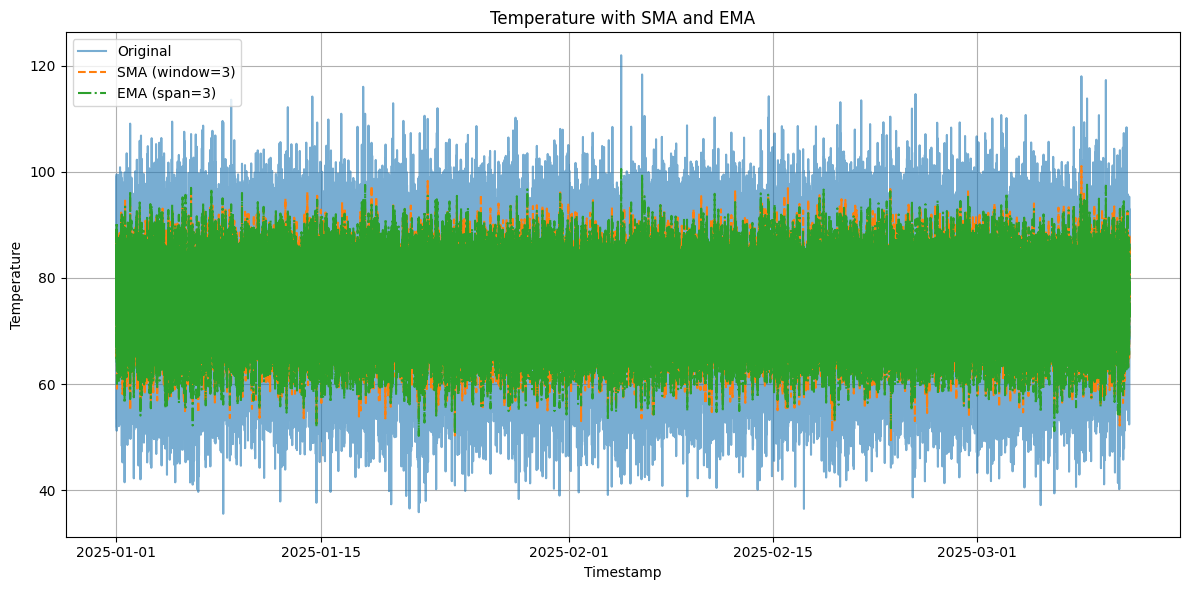

In [5]:
# 📉 Plot
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['temperature'], label='Original', alpha=0.6)
plt.plot(df['timestamp'], df['temp_SMA_3'], label='SMA (window=3)', linestyle='--')
plt.plot(df['timestamp'], df['temp_EMA_3'], label='EMA (span=3)', linestyle='-.')
plt.title('Temperature with SMA and EMA')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### ⚙️ Optional: SMA using `scikit-learn` and `FunctionTransformer`
This is useful when integrating with ML pipelines.

In [6]:
# ⚙️ FunctionTransformer for SMA (3-point)
def rolling_mean(x):
    return pd.Series(x).rolling(window=3).mean().values.reshape(-1, 1)

sma_transformer = FunctionTransformer(func=rolling_mean, validate=False)
temp_sma_sklearn = sma_transformer.fit_transform(df['temperature'])

# Add to DataFrame
df['temp_SMA_sklearn'] = temp_sma_sklearn
df[['temperature', 'temp_SMA_3', 'temp_SMA_sklearn']].head(10)

,temperature,temp_SMA_3,temp_SMA_sklearn
0,78.61,NaN,NaN
1,68.19,NaN,NaN
2,98.94,81.913333,81.913333
3,90.91,86.013333,86.013333
4,72.32,87.390000,87.390000
5,70.88,78.036667,78.036667
6,73.05,72.083333,72.083333
7,90.00,77.976667,77.976667
8,96.04,86.363333,86.363333
9,55.33,80.456667,80.456667


#### ✅ Summary
- ✅ **SMA** smooths data equally across a window
- ✅ **EMA** emphasizes recent values
- Both are helpful for **trend analysis**, **forecasting**, or **feature engineering** in predictive models.

You can experiment with different window/spans depending on your domain!